<a href="https://colab.research.google.com/github/karenrenac/Encryption-of-Biometric-Traits/blob/main/Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y streamlit
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install pycryptodomex


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.3 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y pyngrok ngrok
!pip install pyngrok ngrok --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.0 MB/s eta 0:00:00


In [ ]:
## Visualization, sampling and data loading
import os
import cv2
import random
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
from matplotlib import pyplot as plt
import numpy as np

#Feature Extraction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

#Encrpytion/Decrpytion
from Cryptodome.Cipher import AES
from Cryptodome.Util.Padding import pad, unpad

from pyngrok import ngrok
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.metrics')


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
base_path = '/content/drive/My Drive/Capstone'

Mounted at /content/drive


Unzip Iris dataset from drive

In [ ]:
# Set paths for datasets
iris_zip_path = os.path.join(base_path, 'archive (2).zip')
celeba_csv_path = os.path.join(base_path, 'list_attr_celeba.csv')

# Unzip MMU Iris Database
with zipfile.ZipFile(iris_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/Capstone/iris_data_path/MMU-Iris-Database')

In [ ]:
iris_data_path = '/content/drive/My Drive/Capstone/iris_data_path/MMU-Iris-Database/MMU-Iris-Database'

for root, dirs, files in os.walk(iris_data_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    break  # Show only the top-level directory

Root: /content/drive/My Drive/Capstone/iris_data_path/MMU-Iris-Database/MMU-Iris-Database
Directories: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '5', '6', '7', '8', '9']
Files: ['ReadMe.txt']


In [ ]:
def load_iris_data(data_path, image_size=(128, 128)):
    """
    Load and preprocess iris images from nested dataset structure.
    Args:
        data_path: Path to the dataset folder.
        image_size: Desired size of the output images (height, width).

    Returns:
        images: List of preprocessed images as numpy arrays.
        labels: Corresponding labels for the images.
    """
    images, labels = [], []

    for subject_folder in os.listdir(data_path):
        subject_path = os.path.join(data_path, subject_folder)

        # Check if this is a directory (e.g., '1', '10', etc.)
        if os.path.isdir(subject_path):
            for lr_folder in os.listdir(subject_path):  # 'left' and 'right' folders
                lr_path = os.path.join(subject_path, lr_folder)

                # Check if 'left' or 'right' is a valid directory
                if os.path.isdir(lr_path):
                    for file in os.listdir(lr_path):
                        if file.lower().endswith('.bmp'):  # Only load BMP images
                            img_path = os.path.join(lr_path, file)

                            # Load image in grayscale
                            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                            if img is not None:
                                # Resize image
                                img_resized = cv2.resize(img, image_size)
                                images.append(img_resized)

                                # Label: subject ID + eye side (e.g., "1-left")
                                labels.append(f"{subject_folder}-{lr_folder}")
                            else:
                                print(f"Failed to load image: {img_path}")

    # Normalize pixel values to range [0, 1]
    images = np.array(images) / 255.0
    return images, labels

In [ ]:
# Load dataset
iris_images, iris_labels = load_iris_data(iris_data_path)

# Check the loaded data
print(f"Number of images: {len(iris_images)}")
print(f"Image shape: {iris_images[0].shape}")
print(f"Number of labels: {len(iris_labels)}")
print(f"Unique Labels: {set(iris_labels)}")

Number of images: 450
Image shape: (128, 128)
Number of labels: 450
Unique Labels: {'24-left', '13-right', '11-right', '18-right', '28-left', '43-left', '27-left', '39-left', '45-right', '38-left', '45-left', '14-right', '17-left', '3-right', '20-left', '32-left', '42-right', '16-right', '24-right', '42-left', '12-left', '11-left', '17-right', '30-right', '33-left', '1-right', '13-left', '30-left', '36-right', '1-left', '29-left', '34-left', '14-left', '6-right', '40-right', '44-right', '38-right', '43-right', '19-right', '7-right', '25-right', '32-right', '37-right', '18-left', '16-left', '26-right', '7-left', '36-left', '19-left', '20-right', '6-left', '29-right', '41-right', '25-left', '37-left', '35-right', '44-left', '10-left', '28-right', '46-left', '31-left', '23-left', '10-right', '26-left', '8-left', '22-right', '35-left', '34-right', '8-right', '40-left', '5-left', '3-left', '12-right', '39-right', '2-right', '21-right', '23-right', '21-left', '15-right', '9-right', '41-left'

Iris Data Inspection and Visualization

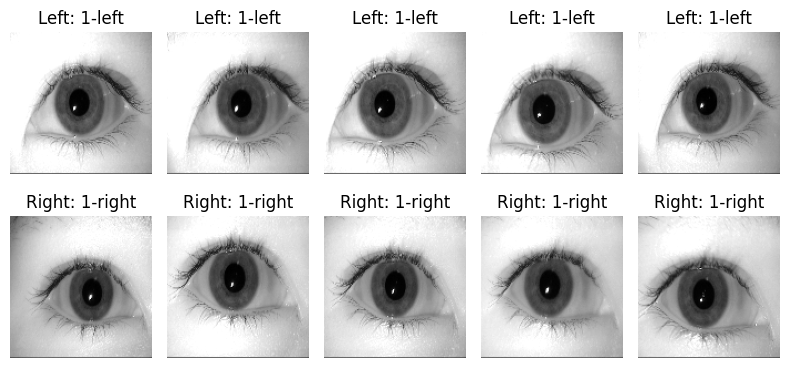

In [ ]:
def visualize_left_right_samples(images, labels, left_label='left', right_label='right', num_samples=5):
    """
    Visualize specified number of 'left' and 'right' images.

    Args:
        images: List or array of images.
        labels: Corresponding list of labels.
        left_label: Label to identify 'left' images.
        right_label: Label
        to identify 'right' images.
        num_samples: Number of images to display for each group.
    """
    # Find indices for left and right images
    left_indices = [i for i, label in enumerate(labels) if left_label in label]
    right_indices = [i for i, label in enumerate(labels) if right_label in label]

    # Select the first 'num_samples' from each group
    selected_left = left_indices[:num_samples]
    selected_right = right_indices[:num_samples]

    # Plot the images
    plt.figure(figsize=(8,4))

    # Plot left images
    for i, idx in enumerate(selected_left):
        plt.subplot(2, num_samples, i+1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Left: {labels[idx]}")
        plt.axis('off')

    # Plot right images
    for i, idx in enumerate(selected_right):
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Right: {labels[idx]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
visualize_left_right_samples(iris_images, iris_labels)

Feature Extraction using Pre - trained CNN's like VGG

In [ ]:
def preprocess_for_cnn(images, target_size=(224, 224)):
    """
    Preprocess grayscale images to match pre-trained CNN input requirements.
    Args:
        images: List or numpy array of grayscale images.
        target_size: Target image size for the pre-trained model (default 224x224).

    Returns:
        preprocessed_images: Array of preprocessed RGB images.
    """
    preprocessed_images = []
    for img in images:
        # Ensure the image is in uint8 format
        img = (img * 255).astype(np.uint8)  # Convert float64 to uint8

        # Resize image
        img_resized = cv2.resize(img, target_size)

        # Convert grayscale to RGB
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)

        preprocessed_images.append(img_rgb)

    return np.array(preprocessed_images)

# Preprocess the iris images
processed_images = preprocess_for_cnn(iris_images)
print(f"Preprocessed Images Shape: {processed_images.shape}")


Preprocessed Images Shape: (450, 224, 224, 3)


Load Pretrained CNN (VGG16)

In [ ]:
# Load the pre-trained VGG16 model without fully connected layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a model for feature extraction
feature_extractor_vgg = Model(inputs=vgg16_base.input, outputs=vgg16_base.output)

# Summary of the model
vgg16_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Extract features from preprocessed images

In [ ]:
def extract_features(model, images):
    """
    Extract features using a pre-trained CNN model.
    Args:
        model: Pre-trained CNN model.
        images: Preprocessed images.

    Returns:
        Flattened feature vectors.
    """
    # Extract features
    features = model.predict(images, verbose=1)
    # Flatten the feature maps to 1D
    features_flattened = features.reshape(features.shape[0], -1)
    return features_flattened

# Extract features
iris_features_vgg = extract_features(feature_extractor_vgg, processed_images)

print(f"Extracted Features Shape: {iris_features_vgg.shape}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 301s 20s/step
Extracted Features Shape: (450, 25088)


Access Face CSV file

In [ ]:
face_csv_path = os.path.join(base_path, 'list_attr_celeba.csv')

# Load CSV
face_df = pd.read_csv(face_csv_path)
print(face_df.head())

     image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  We

Preprocessing - Convert -1 to 0

In [ ]:
# Convert -1 to 0 for binary representation
binary_attributes = face_df.drop(columns=['image_id']).replace({-1: 0})

# Check the updated data
binary_attributes.head()


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
# Verify the replacement
print(binary_attributes.describe())

       5_o_Clock_Shadow  Arched_Eyebrows     Attractive  Bags_Under_Eyes  \
count     202599.000000    202599.000000  202599.000000    202599.000000   
mean           0.111136         0.266981       0.512505         0.204572   
std            0.314301         0.442383       0.499845         0.403389   
min            0.000000         0.000000       0.000000         0.000000   
25%            0.000000         0.000000       0.000000         0.000000   
50%            0.000000         0.000000       1.000000         0.000000   
75%            0.000000         1.000000       1.000000         0.000000   
max            1.000000         1.000000       1.000000         1.000000   

                Bald          Bangs       Big_Lips       Big_Nose  \
count  202599.000000  202599.000000  202599.000000  202599.000000   
mean        0.022443       0.151575       0.240796       0.234532   
std         0.148121       0.358610       0.427568       0.423707   
min         0.000000       0.000000    

Data Visualization

In [ ]:
# Drop non-numeric columns (like image_id) from the dataframe
numeric_face_df = face_df.select_dtypes(include=[int, float])

# Verify the dataframe now only contains numeric data
print(numeric_face_df.dtypes)


5_o_Clock_Shadow       int64
Arched_Eyebrows        int64
Attractive             int64
Bags_Under_Eyes        int64
Bald                   int64
Bangs                  int64
Big_Lips               int64
Big_Nose               int64
Black_Hair             int64
Blond_Hair             int64
Blurry                 int64
Brown_Hair             int64
Bushy_Eyebrows         int64
Chubby                 int64
Double_Chin            int64
Eyeglasses             int64
Goatee                 int64
Gray_Hair              int64
Heavy_Makeup           int64
High_Cheekbones        int64
Male                   int64
Mouth_Slightly_Open    int64
Mustache               int64
Narrow_Eyes            int64
No_Beard               int64
Oval_Face              int64
Pale_Skin              int64
Pointy_Nose            int64
Receding_Hairline      int64
Rosy_Cheeks            int64
Sideburns              int64
Smiling                int64
Straight_Hair          int64
Wavy_Hair              int64
Wearing_Earrin

<Figure size 1000x500 with 0 Axes>

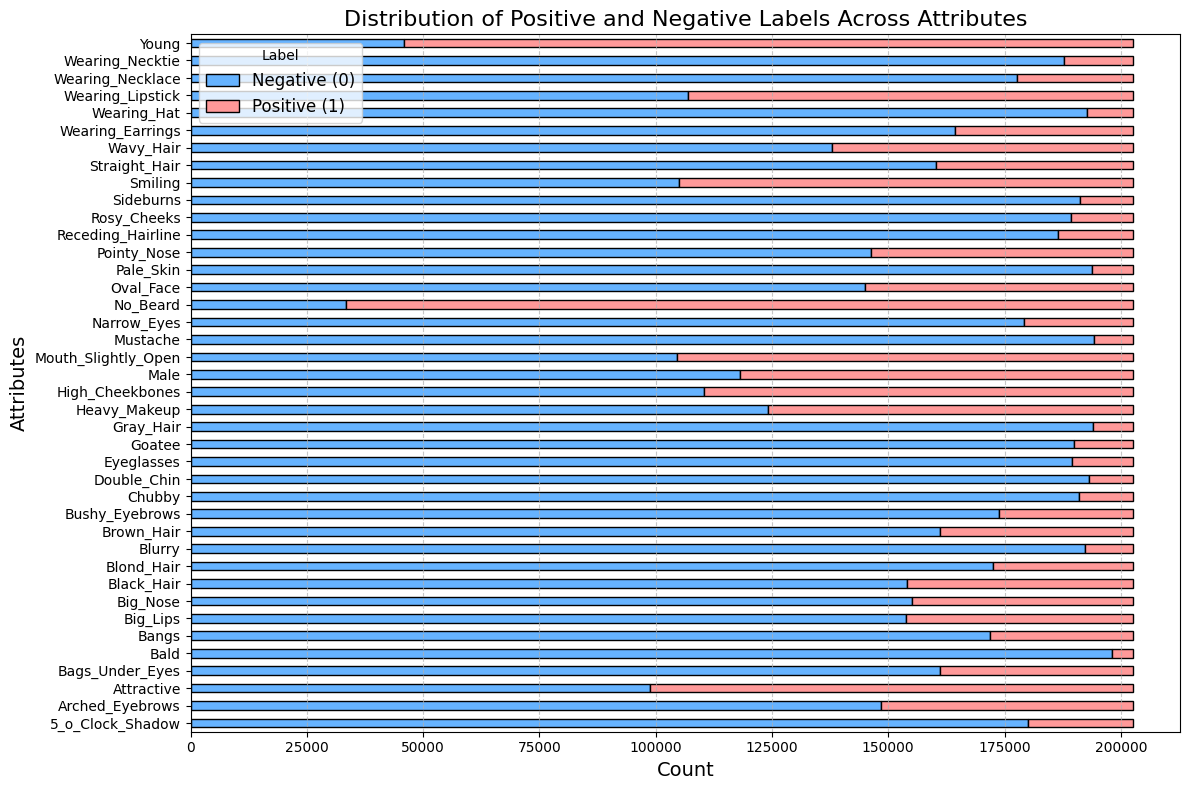

In [ ]:
# Count the number of positive (1) and negative (0) labels for each attribute
attribute_counts = numeric_face_df.apply(pd.Series.value_counts).T.fillna(0)

# Plot the counts for each attribute
plt.figure(figsize=(10, 5))
attribute_counts.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Distribution of Positive and Negative Labels Across Attributes', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Attributes', fontsize=14)
plt.legend(['Negative (0)', 'Positive (1)'], title="Label", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

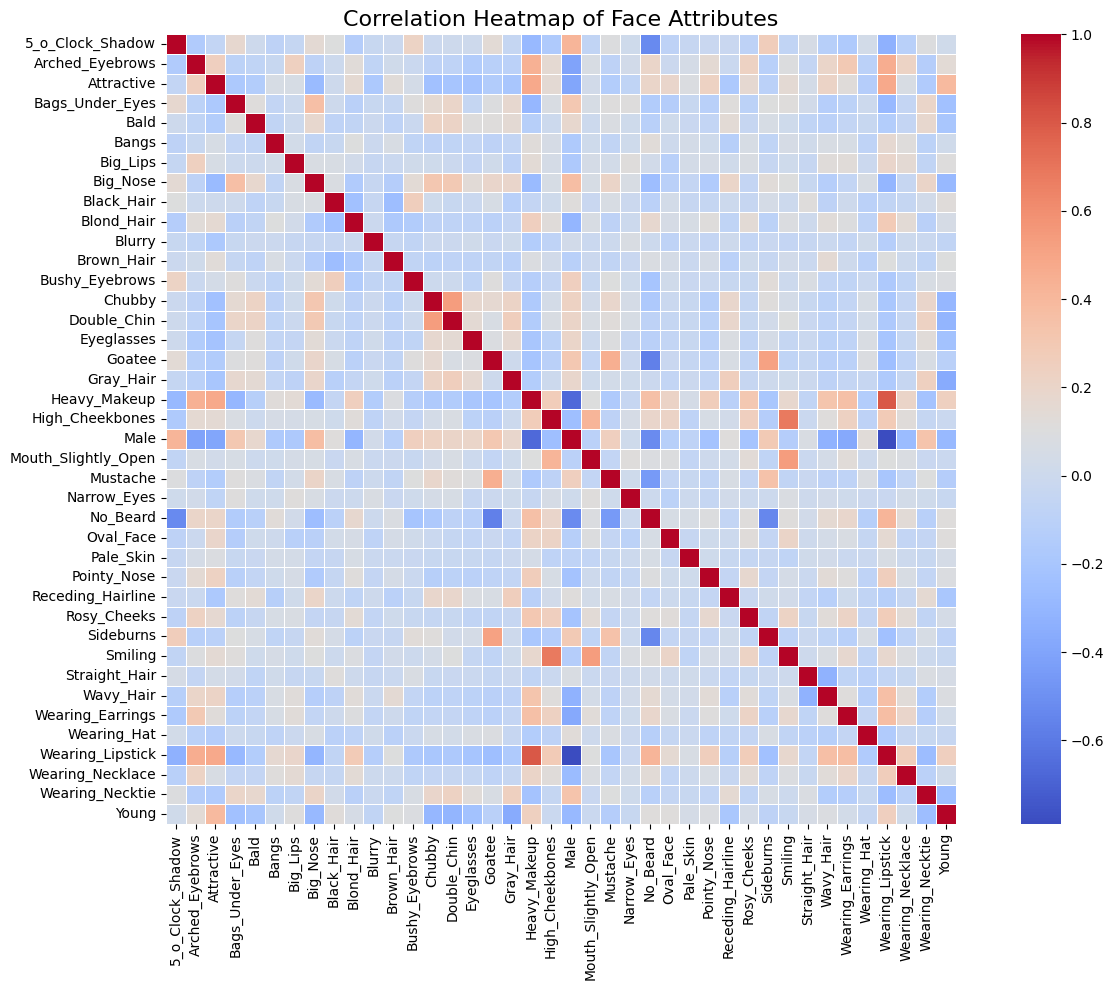

In [ ]:
correlation_matrix = numeric_face_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Face Attributes', fontsize=16)
plt.tight_layout()
plt.show()

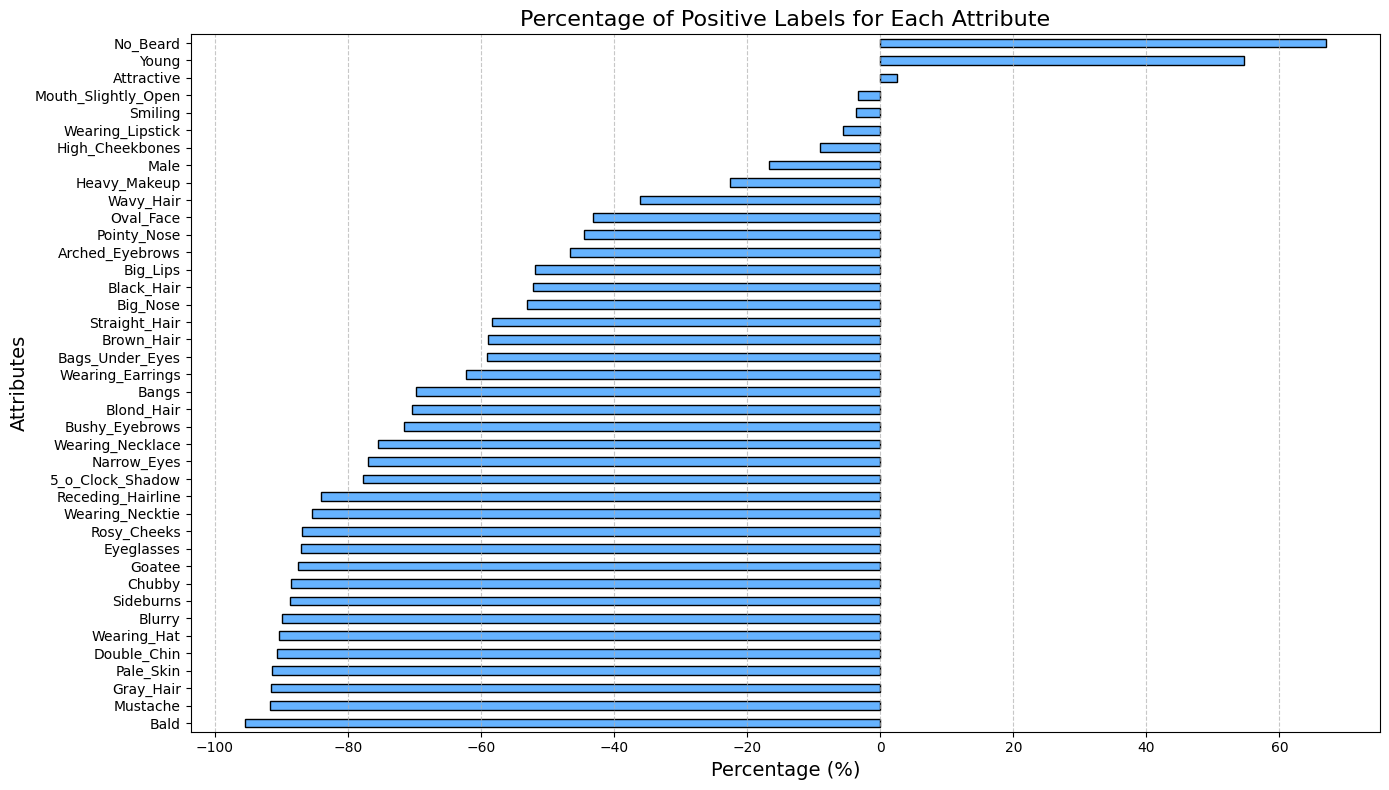

In [ ]:
positive_percentage = (numeric_face_df.sum() / numeric_face_df.shape[0]) * 100

# Sort attributes by percentage
positive_percentage = positive_percentage.sort_values()

# Plot the percentages
plt.figure(figsize=(14, 8))
positive_percentage.plot(kind='barh', color='#66b3ff', edgecolor='black')
plt.title('Percentage of Positive Labels for Each Attribute', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Attributes', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Apply **PCA** to face attributes

In [ ]:
# Step 1: Standardize the face attributes
scaler = StandardScaler()
scaled_face_attributes = scaler.fit_transform(numeric_face_df)  # Use numeric_face_df here

# Step 2: Apply PCA
n_components = 10  # Choose the number of principal components
pca = PCA(n_components=n_components)
pca_face_features = pca.fit_transform(scaled_face_attributes)

# Step 3: Display results
print(f"PCA Face Features Shape: {pca_face_features.shape}")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Retained: {sum(pca.explained_variance_ratio_) * 100:.2f}%")

PCA Face Features Shape: (202599, 10)
Explained Variance Ratio: [0.15194329 0.07034194 0.05519733 0.04549139 0.03787595 0.03576531
 0.03258081 0.03056024 0.02789071 0.02689778]
Total Variance Retained: 51.45%


Combination of Face and Iris Features

In [ ]:
# Randomly sample 450 rows from the PCA face features as there are 450 samples of iris images
np.random.seed(42)  # For reproducibility
sampled_pca_face_features = pca_face_features[np.random.choice(pca_face_features.shape[0], 450, replace=False)]

# Ensure the sample sizes now match
print(f"Iris Features Shape: {iris_features_vgg.shape}")
print(f"Sampled Face Features Shape: {sampled_pca_face_features.shape}")

# Combine the features
combined_features = np.hstack((iris_features_vgg, sampled_pca_face_features))
print(f"Combined Features Shape: {combined_features.shape}")

Iris Features Shape: (450, 25088)
Sampled Face Features Shape: (450, 10)
Combined Features Shape: (450, 25098)


**Quantization-based key generation**

Normalise and flatten the combined features

In [ ]:
def quantization_key_extraction(biometric_features, num_bins=16):
    """
    Extract a biometric key using quantization-based techniques.
    Args:
        biometric_features (np.ndarray): Biometric features (2D array, shape: [num_samples, num_features]).
        num_bins (int): Number of quantization bins.

    Returns:
        np.ndarray: A binary biometric key for each sample.
    """
    # Step 1: Normalize features to [0, 1]
    scaler = MinMaxScaler()
    normalized_features = scaler.fit_transform(biometric_features)

    # Step 2: Define bin edges
    bin_edges = np.linspace(0, 1, num_bins + 1)

    # Step 3: Quantize features into bin indices
    quantized_indices = np.digitize(normalized_features, bins=bin_edges) - 1  # Convert to 0-based bins

    # Step 4: Encode bin indices into binary format
    bin_width = int(np.ceil(np.log2(num_bins)))  # Bits per bin
    binary_keys = []
    for indices in quantized_indices:
        binary_key = ''.join([format(index, f'0{bin_width}b') for index in indices])  # Binary representation
        binary_keys.append(binary_key)

    return binary_keys

# Example biometric features (assume combined_features are already generated)
biometric_features = combined_features  # Shape: [num_samples, num_features]
num_bins = 16  # Number of bins for quantization

# Extract binary keys for all samples
binary_keys = quantization_key_extraction(biometric_features, num_bins=num_bins)

# Display an example key
print(f"Example Binary Key (First Sample): {binary_keys[0][:256]}")


Example Binary Key (First Sample): 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000001101000000000000000000000000000000000000000000000000


Convert Binary key to Bytes for AES

In [ ]:
def binary_to_bytes(binary_key, key_length=256):
    """
    Convert a binary string key to bytes for use in AES encryption.
    Args:
        binary_key (str): Binary string key.
        key_length (int): Desired length of the key in bits (e.g., 256 for AES-256).

    Returns:
        bytes: Byte-formatted key for AES.
    """
    # Truncate or pad the binary key to match the required length
    truncated_key = binary_key[:key_length]
    # Convert binary string to bytes
    return int(truncated_key, 2).to_bytes(key_length // 8, byteorder='big')

# Example: Convert the first binary key
aes_key = binary_to_bytes(binary_keys[0], key_length=256)
print(f"AES Key (Hex): {aes_key.hex()}")

AES Key (Hex): 000000000000000000000000000030000000000000000000000d000000000000


AES using Galois/Counter Mode (GCM)

In [ ]:
# Example: AES key (derived from your biometric key generation pipeline)
aes_key = binary_to_bytes(binary_keys[0], key_length=256)

# Text data to encrypt
text_data = input("Enter the text to encrypt: ")
data_bytes = text_data.encode('utf-8')

# Step 1: Encrypt Data with AES-GCM
cipher = AES.new(aes_key, AES.MODE_GCM)  # AES in GCM mode
nonce = cipher.nonce  # Generate a unique nonce for this encryption
encrypted_data, tag = cipher.encrypt_and_digest(data_bytes)  # Encrypt and create authentication tag

print(f"Encrypted Data (Hex): {encrypted_data.hex()}")
print(f"Authentication Tag (Hex): {tag.hex()}")
print(f"Nonce (Hex): {nonce.hex()}")

# Step 2: Decrypt Data and Verify Integrity
cipher_decrypt = AES.new(aes_key, AES.MODE_GCM, nonce=nonce)  # Initialize cipher with the same nonce
decrypted_data = cipher_decrypt.decrypt_and_verify(encrypted_data, tag)  # Decrypt and verify the tag

print(f"Decrypted Data: {decrypted_data.decode('utf-8')}")

Enter the text to encrypt: Sensitive information
Encrypted Data (Hex): e368c1f47a4b5b02954ea3a333e03872bc17413999
Authentication Tag (Hex): e982ed70e6be7476f4990441d153a5ef
Nonce (Hex): 586afe44613ba109f831954983b5c059
Decrypted Data: Sensitive information


Using Streamlit for UI

In [ ]:
%%writefile app.py

In [ ]:
!fuser -k 8501/tcp  # Kill any process using port 8501
!pkill -f streamlit  # Kill all Streamlit processes
!pkill -f ngrok  # Kill all Ngrok processes


In [ ]:
import os
from pyngrok import ngrok

# Step 1: Kill any processes using port 8501
os.system("fuser -k 8501/tcp")

# Step 2: Start Streamlit in the background
os.system("streamlit run app.py --server.port 8501 --server.headless true --server.enableCORS true --server.fileWatcherType none &")

# Step 3: Start Ngrok
ngrok.set_auth_token("token")  # Replace with your auth token
public_url = ngrok.connect(8501)
print(f"Streamlit is running at: {public_url.public_url}")


In [ ]:
print(ngrok.get_tunnels())

In [ ]:
ngrok.kill()